In [1]:
from chebGreen.greenlearning.model import *
from chebGreen.chebpy2 import Chebfun2, Chebpy2Preferences
import matplotlib.pyplot as plt

%env TF_MLC_LOGGING=1 
%env TF_CPP_MIN_LOG_LEVEL=2

env: TF_MLC_LOGGING=1
env: TF_CPP_MIN_LOG_LEVEL=2


In [2]:
model = GreenNN()
model.build(loadPath = "savedModels/laplace")

In [3]:
%%time
cheb2prefs = Chebpy2Preferences()
# cheb2prefs.prefx.eps = 1e-6
# cheb2prefs.prefx.eps = 1e-6
g = Chebfun2(model.evaluateG, domain = [0, 1, 0, 1], prefs = cheb2prefs, simplify = False)

CPU times: user 1.25 s, sys: 397 ms, total: 1.65 s
Wall time: 1.88 s


In [4]:
g

chebfun2 object
     domain       rank               corner values
[0,1] x [0,1]     181       [-0.000 -0.000 -0.000 0.000]
vertical scale = 0.249528

0.24952826


(0.0, 1.0)

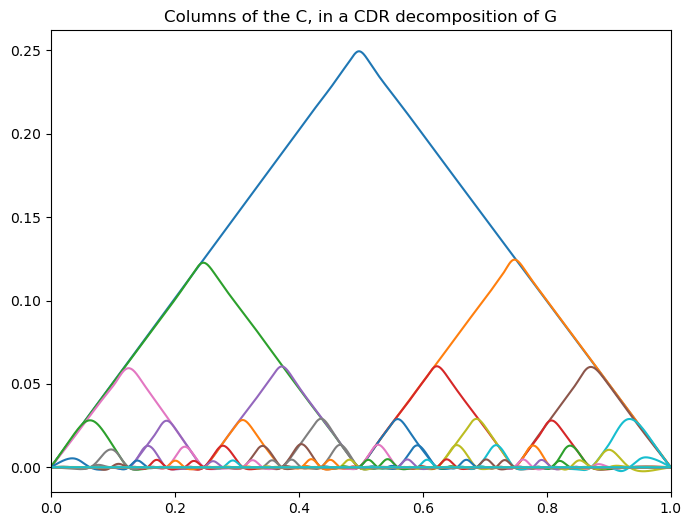

In [5]:
i = slice(0,-1)
fig = plt.figure(figsize = (8,6))
g.cols[:,i].plot()
print(np.max(g.cols[:,i].vscale))
plt.title(f'Columns of the C, in a CDR decomposition of G')
plt.xlim([0,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [6]:
%%time
u,s,v = g.svd()

CPU times: user 5.24 s, sys: 3.02 s, total: 8.26 s
Wall time: 3.47 s


1.0358458719583543


(0.0, 1.0)

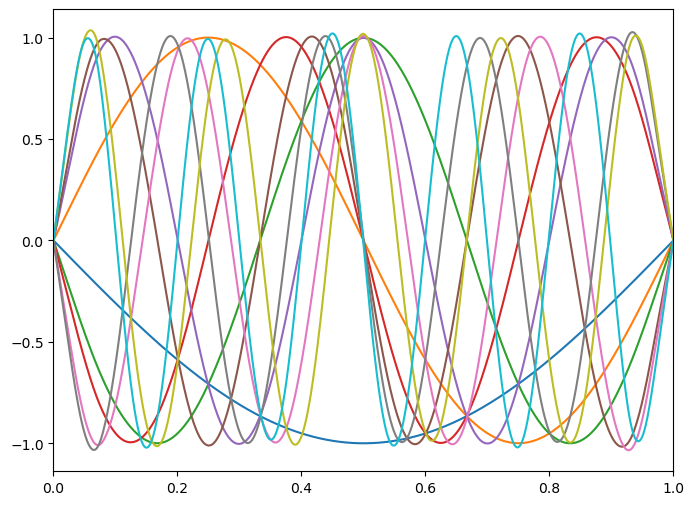

In [7]:
# i = slice(10,20)
i = slice(0,10)
# i = 16
fig = plt.figure(figsize = (8,6))
u[:,i].plot()
print(np.max(u[:,i].vscale))
# plt.title(f'First {i+1} left singular functions for a Laplacian')
plt.xlim([0,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [8]:
u[0,i]

array([-6.12938011e-08, -8.71841932e-09, -6.07082709e-08, -1.45917868e-07,
       -1.76881267e-07, -2.31677271e-08, -8.94735996e-09,  2.12405840e-07,
        1.02054049e-07, -1.01309677e-07])

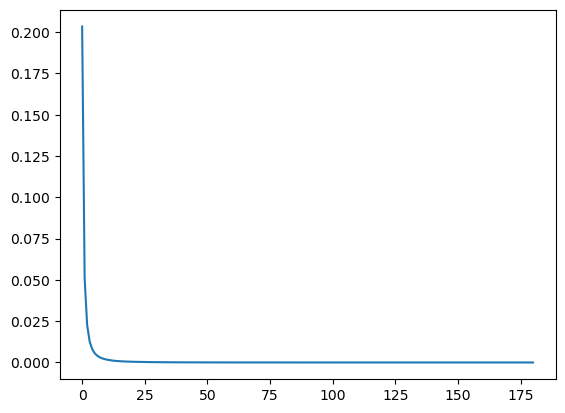

In [9]:
plt.figure()
plt.plot(s)

In [10]:
xx = np.linspace(0,1,2000)
yy = np.linspace(0,1,2000)
x, y = np.meshgrid(xx,yy)

CPU times: user 1.54 s, sys: 447 ms, total: 1.98 s
Wall time: 2.92 s


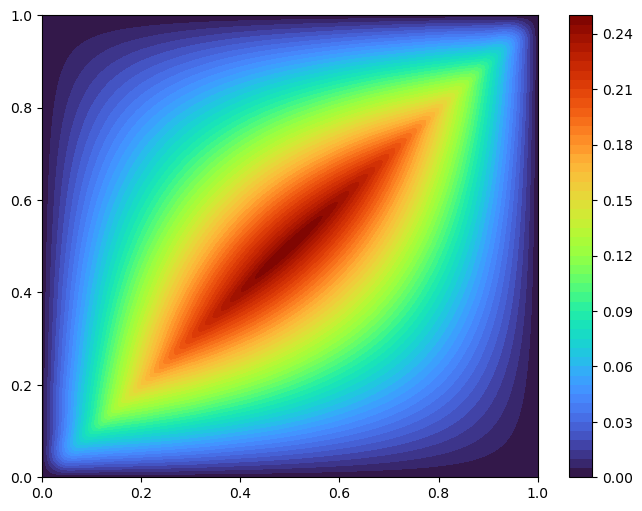

In [11]:
%%time
Gneural = model.evaluateG(x,y)

fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,Gneural, 50, cmap = 'turbo', vmin = np.min(Gneural), vmax = np.max(Gneural))
plt.colorbar()
# fig.savefig(f'poisson_greenlearning.png', dpi = fig.dpi)

CPU times: user 4.71 s, sys: 2.68 s, total: 7.39 s
Wall time: 2.53 s


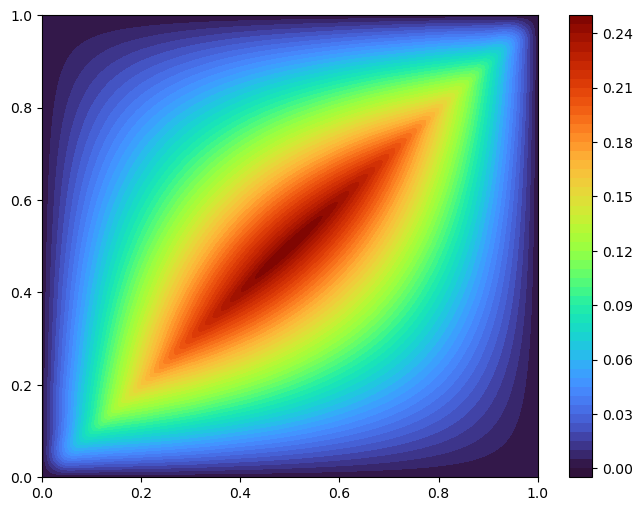

In [12]:
%%time
G = g[x,y]
fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()
# fig.savefig(f'poisson_greenlearning_chebfun2.png', dpi = fig.dpi)